## 머신러닝
# 신경망

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 신경망 수작업 계산

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [32]:
X = iris.data[:, :3] # 속성 3개
y = iris.data[:, 3] # petal_width
X.shape, y.shape

((150, 3), (150,))

In [42]:
# 가중치 초기화
W1 = np.random.randn(3, 100)
b1 = np.random.randn(100)
W2 = np.random.randn(100, 10)
b2 = np.random.randn(10)
W3 = np.random.randn(10,1)
b3 = np.random.randn(1)
W1.shape, b1.shape, W2.shape, b2.shape, W3.shape, b3.shape

((3, 100), (100,), (100, 10), (10,), (10, 1), (1,))

In [43]:
y1 = X@W1 + b1
y1[y1<0] = 0 # 활성화함수(relu) 적용
y1.shape

(150, 100)

In [44]:
y2 = y1@W2 + b2
y2[y2<0] = 0
y2.shape

(150, 10)

In [45]:
y3 = y2@W3 + b3 # 출력층에는 활성화함수 적용하지 않음 (선형회귀의 경우)
y3.shape

(150, 1)

In [46]:
y_pred = y3.ravel()
y_pred.shape

(150,)

In [47]:
mse = ((y-y_pred)**2).mean()
mse

490.95964657911907

In [48]:
y_pred

array([ 9.38463985, 10.09321266,  8.17764146, 13.68759393, 10.18785946,
       15.69787709, 10.44850228, 12.00880961, 11.52941268, 12.95422264,
       10.2763499 , 15.4823753 , 10.33766976,  7.61559688, 12.68542153,
       12.69790208, 11.33976524,  9.38463985, 15.32171387, 11.65882173,
       17.16850447, 11.20989092, 12.88677097, 18.13291864, 23.72549171,
       15.99860459, 15.03551617, 11.267825  ,  8.55039036, 16.29405581,
       16.27360425, 11.09019355, 12.11241287, 12.43951884, 12.95422264,
        8.07063573,  9.14882786, 10.4990398 ,  8.24057363, 11.78538004,
        9.07764095,  9.86533728,  9.17420252, 14.74139069, 21.79948029,
       10.33766976, 13.6355847 , 10.39875488, 10.58753024,  9.20701196,
       36.31008017, 34.89180391, 33.59207335, 22.396398  , 29.94703708,
       24.90180692, 34.50079137, 25.63916106, 31.50827325, 25.86738656,
       20.12942433, 31.64490578, 25.52991501, 27.09906062, 33.74301882,
       35.87902827, 27.38382563, 27.57561007, 23.35619341, 25.99

### 이후 작업
> - 오차(mse)를 줄이도록 가중치들(W1,b1,W2,b2,W3,b3)의 값을 바꾼다.
> - 이는 오차역전파법(backpropagation)을 이용해 수행한다.
> - tensorflow 가 하는 역할은 오차역전파법을 지원하는 것이다.

### tensorflow 와 keras 적용

In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [5]:
tf.__version__

'2.5.0'

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [83]:
X = iris.data[:, :3] # 속성 3개
y = iris.data[:, 3] # petal_width
X.shape, y.shape

((150, 3), (150,))

In [98]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(3,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))

In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               400       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 1,421
Trainable params: 1,421
Non-trainable params: 0
_________________________________________________________________


In [100]:
y_pred = model.predict(X)
y_pred.shape

(150, 1)

### 신경망 훈련

In [101]:
model.compile(loss='mse', optimizer='adam')

In [102]:
history = model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50
5/5 [==============================] - 0s 5ms/step - loss: 1.1793
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6524
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3703
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3059
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3040
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 0.2546
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1998
Epoch 8/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1736
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.1580
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 0.1357
Epoch 11/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1142
Epoch 12/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1026
Epoch 13/50
5/5 [==============================] - 0s 5ms/step - loss: 0.

In [103]:
y_pred = model.predict(X)

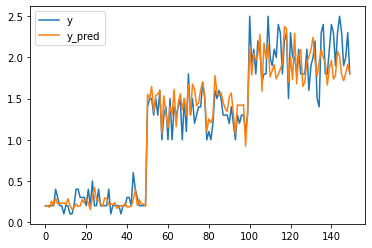

In [104]:
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y', 'y_pred'])

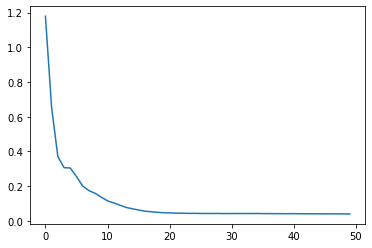

In [105]:
plt.plot(history.history['loss'])

### MNIST 분류

In [132]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
28*28

784

In [107]:
X_train.max(), X_train.min()

(255, 0)

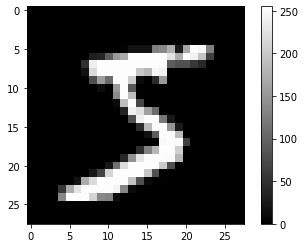

In [110]:
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()

In [133]:
### 데이터 전처리
X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1, 28*28)/255
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [112]:
### 원핫인코딩
y_train = np.eye(10)[y_train]
y_test  = np.eye(10)[y_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [117]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # 10개 클래스로 분류 => softmax

In [118]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [121]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2954 - acc: 0.9160 - val_loss: 0.1618 - val_acc: 0.9520
Epoch 2/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.1290 - acc: 0.9614 - val_loss: 0.1228 - val_acc: 0.9629
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.0907 - acc: 0.9724 - val_loss: 0.1206 - val_acc: 0.9637
Epoch 4/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.0673 - acc: 0.9788 - val_loss: 0.1080 - val_acc: 0.9684
Epoch 5/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0518 - acc: 0.9836 - val_loss: 0.1161 - val_acc: 0.9671
Epoch 6/20
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0432 - acc: 0.9860 - val_loss: 0.1116 - val_acc: 0.9698
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0347 - acc: 0.9890 - val_loss: 0.1205 - val_acc: 0.9695
Epoch 8/20
1407/1407 [==============================] - 8

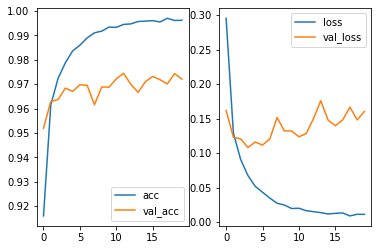

In [122]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [134]:
y_pred = model.predict(X_test)
y_pred.shape

(10000, 10)

In [135]:
y_pred[:20].argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4],
      dtype=int64)

In [131]:
y_test[:20].argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)

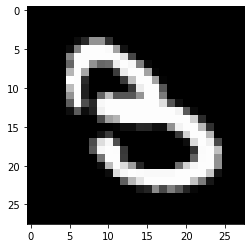

In [136]:
plt.imshow(X_test[18].reshape(28,28), cmap='gray')

### 딥러닝 적용
- CNN : Convolution Neural Network

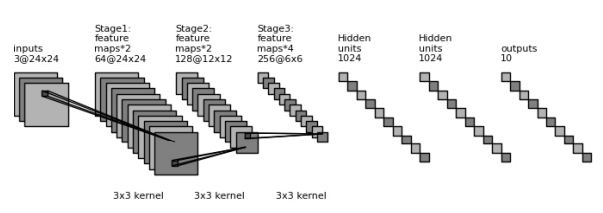

- convolution
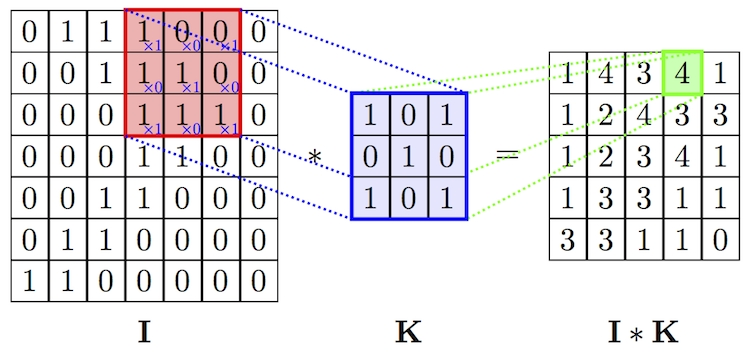

- pooling
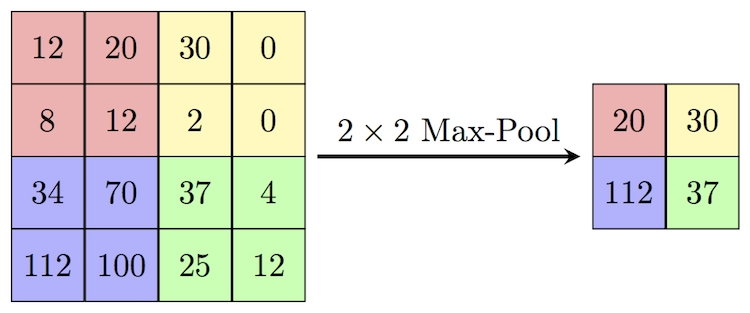

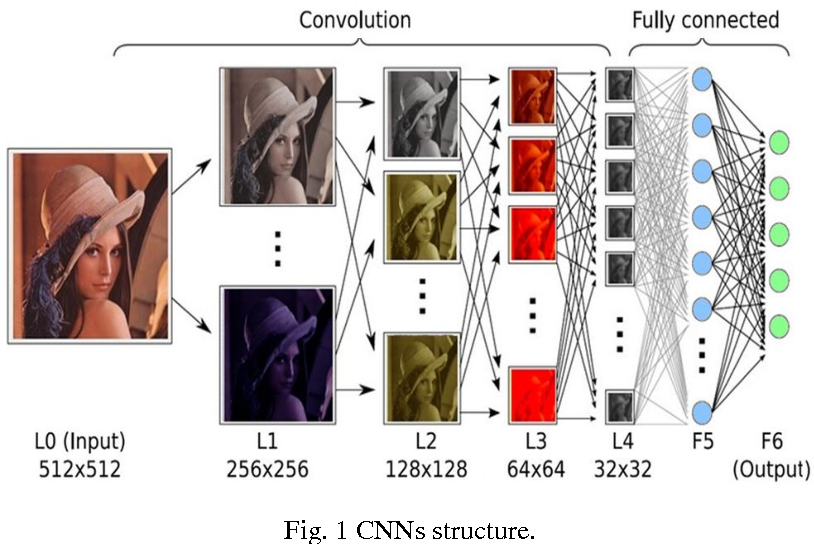

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
### 데이터 전처리
X_train = X_train.reshape(-1,28,28,1)/255 # 0~1 사이의 값으로 정규화
X_test = X_test.reshape(-1,28,28,1)/255
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
### 원핫인코딩
y_train = np.eye(10)[y_train]
y_test  = np.eye(10)[y_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), padding='same',
                              activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=60, kernel_size=(3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=120, kernel_size=(3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [165]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 30)        300       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 60)        16260     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 60)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 120)         64920     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 120)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1080)            

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.25)

Epoch 1/10
450/450 [==============================] - 22s 36ms/step - loss: 0.2330 - acc: 0.9300 - val_loss: 0.0784 - val_acc: 0.9745 a
Epoch 2/10
450/450 [==============================] - 15s 33ms/step - loss: 0.0541 - acc: 0.9836 - val_loss: 0.0658 - val_acc: 0.9805
Epoch 3/10
450/450 [==============================] - 18s 40ms/step - loss: 0.0355 - acc: 0.9889 - val_loss: 0.0443 - val_acc: 0.9861
Epoch 4/10
450/450 [==============================] - 19s 43ms/step - loss: 0.0270 - acc: 0.9917 - val_loss: 0.0444 - val_acc: 0.9849
Epoch 5/10
450/450 [==============================] - 18s 39ms/step - loss: 0.0214 - acc: 0.9933 - val_loss: 0.0370 - val_acc: 0.9886
Epoch 6/10
450/450 [==============================] - 17s 38ms/step - loss: 0.0180 - acc: 0.9938 - val_loss: 0.0473 - val_acc: 0.9865
Epoch 7/10
450/450 [==============================] - 16s 36ms/step - loss: 0.0140 - acc: 0.9954 - val_loss: 0.0386 - val_acc: 0.9897
Epoch 8/10
450/450 [==============================] - 17s 37

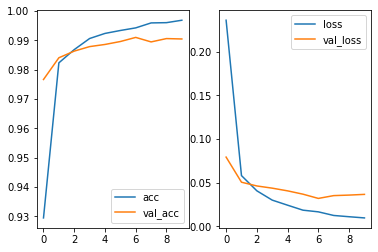

In [168]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [9]:
y_pred = model.predict(X_test)
y_pred.shape

(10000, 10)

In [10]:
np.where(y_pred.argmax(axis=1) != y_test.argmax(axis=1)) # 틀린 이미지 번호

(array([ 247,  321,  340,  381,  435,  449,  495,  582,  740,  936,  947,
        1014, 1112, 1202, 1226, 1232, 1260, 1299, 1319, 1378, 1393, 1415,
        1425, 1522, 1530, 1549, 1681, 1686, 1737, 1790, 1878, 1901, 1955,
        2130, 2135, 2225, 2293, 2447, 2462, 2597, 2654, 2758, 2770, 2896,
        2927, 2939, 2953, 3023, 3062, 3073, 3225, 3289, 3422, 3448, 3475,
        3520, 3558, 3727, 3767, 3941, 3951, 4075, 4176, 4359, 4360, 4374,
        4380, 4639, 4712, 4731, 4743, 4763, 4807, 4823, 5749, 5937, 5981,
        5997, 6004, 6042, 6555, 6571, 6576, 6597, 6625, 6651, 6755, 6783,
        6847, 7049, 7094, 7208, 7216, 7259, 7921, 8339, 8408, 8522, 9009,
        9015, 9019, 9638, 9642, 9664, 9679, 9729, 9755, 9770, 9839, 9850],
       dtype=int64),)

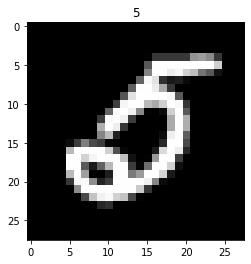

In [32]:
n = 9770
plt.title(np.argmax(y_test[n]))
plt.imshow(X_test[n,:,:,0], cmap='gray')

In [176]:
(y_pred.argmax(axis=1) == y_test.argmax(axis=1)).mean() # 정확도 계산

0.9925